# **Estudo Dirigido 4 - Processamento Monádico**

**Aluno:** André Paiva Conrado Rodrigues

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

Para esta atividade é utilizada a `machinevisiontoolbox` do Peter Corke e a biblioteca `matplotlib` para exibição de imagens.

In [ ]:
from machinevisiontoolbox import *
from matplotlib import pyplot as plt

## 2 - Abrindo a imagem (`uint8`)

Primeiramente, é importada a imagem original com representação numérica em `uint8`.

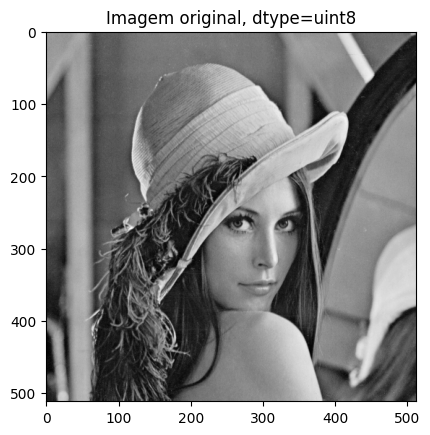

In [2]:
# Leitura da imagem original
lena_uint8 = Image.Read("lena.pgm", dtype='uint8')

# Exibição da imagem original
fig, ax = plt.subplots(1, 1)
im = ax.imshow(lena_uint8.image, cmap='gray')
ax.set_title('Imagem original, dtype=' + str(lena_uint8.image.dtype))
plt.show()

## 3 - Processamentos monádicos (`uint8`)

São feitos os processamentos de brilho, contraste, negativo e posterização na imagem com representação numérica em `uint8`.

É possível notar que o comportamento dos processamentos de brilho e contraste não ocorre exatamente como o esperado, apresentando distorções nos valores de alguns pixels. Provavelmente **os artefatos se devem à limitação da representação numérica em `uint8`**, visto que valores que excedem 255 sofrem overflow (o nono bit é descartado). Mesmo aplicando *clipping* (saturação) dos valores entre 0 e 255, o problema não é contornado.

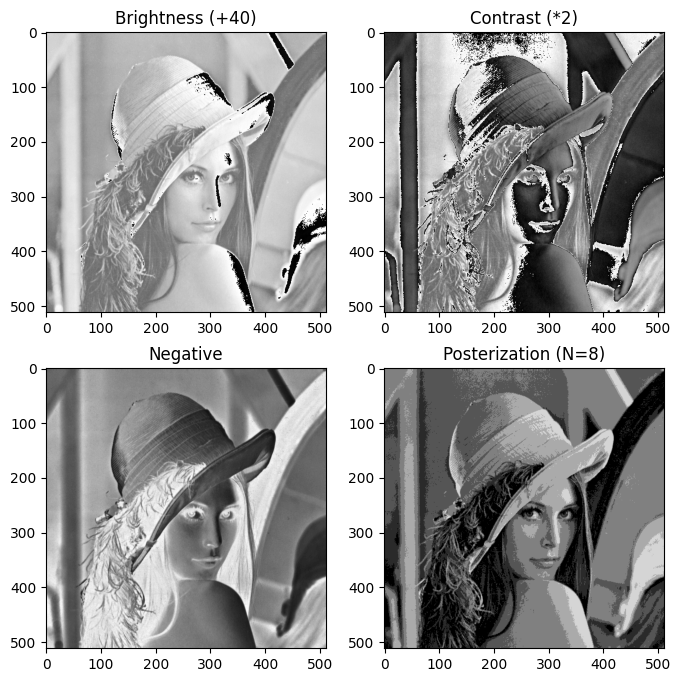

In [3]:
# Processamentos em uint8
brightness_uint8 = np.clip(lena_uint8.image + 60, 0, 255)
contrast_uint8 = np.clip(lena_uint8.image * 2, 0, 255)
negative_uint8 = 255 - lena_uint8.image
posterization_uint8 = 8 * np.floor(lena_uint8.image/(256/8))

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
brightness_uint8_plot = ax[0][0].imshow(brightness_uint8, cmap='gray')
ax[0][0].set_title('Brightness (+40)')
contrast_uint8_plot = ax[0][1].imshow(contrast_uint8, cmap='gray')
ax[0][1].set_title('Contrast (*2)')
negative_uint8_plot = ax[1][0].imshow(negative_uint8, cmap='gray')
ax[1][0].set_title('Negative')
posterization_uint8_plot = ax[1][1].imshow(posterization_uint8, cmap='gray')
ax[1][1].set_title('Posterization (N=8)')
plt.show()

## 4 - Abrindo a imagem (`double`)

A imagem original agora é importada com representação numérica em `double`.

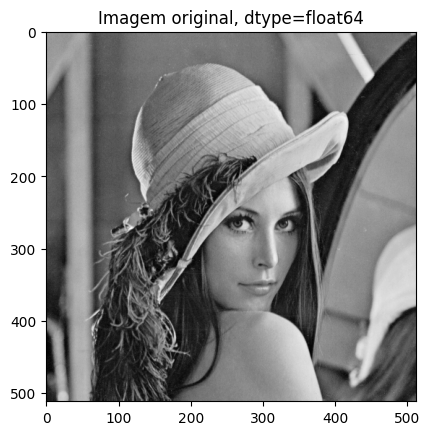

In [4]:
# Leitura da imagem original
lena_double = Image.Read("lena.pgm", dtype='double')

# Exibição da imagem original
fig, ax = plt.subplots(1, 1)
im = ax.imshow(lena_double.image, cmap='gray')
ax.set_title('Imagem original, dtype=' + str(lena_double.image.dtype))
plt.show()

## 5 - Processamentos monádicos (`double`)

São feitos os processamentos de brilho, contraste, negativo e posterização na imagem com representação numérica em `double`.

Nos processamentos de brilho e contraste, é aplicado um *clipping* dos valores entre 0.0 e 1.0 para simular a saturação dos valores. Vemos que os efeitos de brilho e contraste se comportam como o esperado, pois não há mais a limitação de *overflow* inerente à representação numérica em `uint8`.

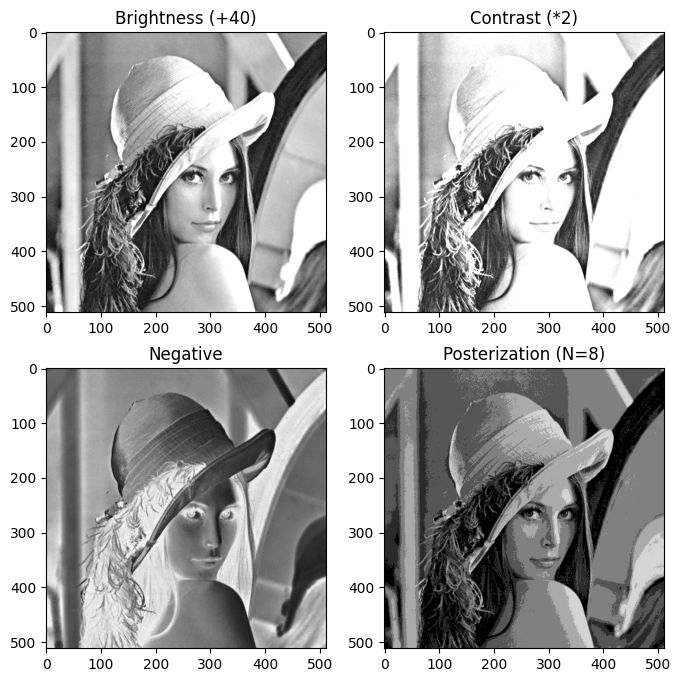

In [5]:
# Processamentos em double
brightness_double = np.clip(lena_double.image + 0.3, 0.0, 1.0)
contrast_double = np.clip(lena_double.image * 2.0, 0.0, 1.0)
negative_double = 1.0 - lena_double.image
posterization_double = np.floor(lena_double.image*8.0)/8.0

# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
brightness_double_plot = ax[0][0].imshow(brightness_double, cmap='gray')
ax[0][0].set_title('Brightness (+40)')
contrast_double_plot = ax[0][1].imshow(contrast_double, cmap='gray')
ax[0][1].set_title('Contrast (*2)')
negative_double_plot = ax[1][0].imshow(negative_double, cmap='gray')
ax[1][0].set_title('Negative')
posterization_double_plot = ax[1][1].imshow(posterization_double, cmap='gray')
ax[1][1].set_title('Posterization (N=8)')
plt.show()